In [1]:
import pandas as pd

df = pd.read_csv('/datasets/games.csv')

display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**1. Предобработка данных**

 **1.1 Приведение названия столбцов в нижний регистр**
 
 **1.2 Меняю тип данных year_of_release на int и user_score на float**
 
 **1.3 Обработка пропусков**
 
  1.3.1 Столбец name имеет два пропуска, удаляю строки
  
  1.3.2 Столбец year_of_release содержит 269 пропусков, так как для анализа эти данные важны и узнать их нет возможности, то такие строки просто удаляю
  
  1.3.3 Столбцы critic_score, user_score имеют большое количество пропусков. Так как это количественные переменные, то заполняю пропуски наиболее характерными значениями этих столбцов (средним каждого типа жанра).
  
  1.3.4 Столбец rating также имеет пропуски, так как это категориальная переменная, то просто пропуски заполняю значением unknown
  
  
  В столбце user_score есть значения tbd, которые означают, что рейтинг ещё не присвоен. Эти значения мешаю поменять тип данных на float. Не знаю как лучше поступить с такими значениями и пока что решил просто заменить их на среднюю оценку данного жанра.
  
  Для удобства сложил продажы по регионам в переменную total_sales

In [2]:
df.columns = df.columns.str.lower()

<div class="alert alert-info">
Показывю количество пропусков по каждому столбцу в датасете в абсолютных и относительных значениях


1. 
как и писал выше, строки с отсутствием названия игр, жанра и датой релиза просто удаляю так как это важная информация и заполнить её ничем не получится, плюс они имеют маленький процент пропусков (0 и 2%). Причиной отсутствия данных может быть некорректная работа программы при формировании данных или человеческий фактор.
    
2.
Не могу найти связь с пропусками в столбце с рейтингами и американским агенством. Подумал, что возможно причиной может быть год выпуска игр, но нет, пропуски есть и в 2016 и 2015 годах. Посмотрел на продажи, но и тут не смог найти явной закономерности. Продажи игр с пропусками в рейтингах есть во всех регионах, более того, в американском они всегда больше чем в других. Почему нет рейтингов это вопрос. Единственно, возможно отсутствие рейтинга от американского агенства связано с платформами. То есть, этот рейтинг применяется только на популярных американских платформах, о чем показывает круговая диаграмма, где доля популярных американских платформ очень низкая.
    
3. Я думал будет лучше заполнить пропуски с рейтингами именно по средним рейтингам каждого жанра, так цифры будут искажены меньше всего. Из твоего сообщения понял, что это ошибка. Тогда не буду заполнять пропуски с рейтингами совсем. Удалять такие данные думаю тоже лишнее, так как их почти половина от всех наблюдений. В итоге просто закомментирую своё первое решение.
    
4. На дубликаты проверил, их нет.

name - 0% - 2
platform - 0% - 0
year_of_release - 2% - 269
genre - 0% - 2
na_sales - 0% - 0
eu_sales - 0% - 0
jp_sales - 0% - 0
other_sales - 0% - 0
critic_score - 51% - 8578
user_score - 40% - 6701
rating - 40% - 6766
total_sales - 0% - 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


0


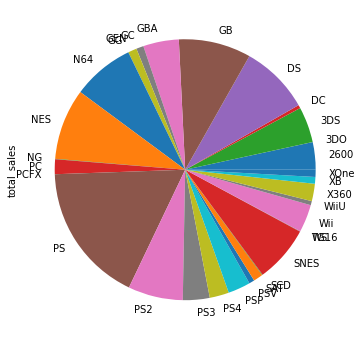

In [3]:
import numpy as  np

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

for col in df.columns:
    percent_data = np.mean(df[col].isnull())
    sum_data = df[col].isnull().sum()
    print('{} - {}% - {}'.format(col, round(percent_data*100), sum_data))
    
empty_rating_data = df.query('rating.isna()')
display(empty_rating_data.head())
#year_group = empty_rating_data.groupby(by='year_of_release')['total_sales'].sum()
#year_group.plot.bar(rot=30, figsize=(19,6), grid=True);
platform_group = empty_rating_data.groupby(by='platform')['total_sales'].sum()
platform_group.plot.pie(rot=30, figsize=(19,6), grid=True);

print(df.duplicated().sum())

In [4]:
df = df.dropna(subset=['name', 'genre', 'year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

#genre_grouped_csm = df.groupby(by='genre')['critic_score'].mean() #csm - critic_score_mean
#list_of_genre_csm = df['genre'].unique()
#for row in list_of_genre_csm: # меняю пропуски на среднее значение каждого жанра
    #df.loc[(df['genre'] == row)&(df['critic_score'].isna()), 'critic_score'] = genre_grouped_csm[row]
#df['critic_score'] = df['critic_score'].round()

#user_score_mean = df.drop(df[df['user_score'] == 'tbd'].index) # удаляю значения tbd чтобы посчитать среднее для жанра
#user_score_mean['user_score'] = user_score_mean['user_score'].astype('float')
#genre_grouped_usm = user_score_mean.groupby(by='genre')['user_score'].mean().round()
#list_of_genre_usm = df['genre'].unique()

#for row in list_of_genre_usm: # меняю пропуски на среднее значение для каждого жанра
    #df.loc[(df['genre'] == row)&(df['user_score'].isna()), 'user_score'] = genre_grouped_usm[row]
#for row in list_of_genre_usm: # меняю tbd на среднее значение для каждого жанра
    #df.loc[(df['genre'] == row)&(df['user_score'] == 'tbd'), 'user_score'] = genre_grouped_usm[row]
#df['user_score'] = df['user_score'].astype('float')

df.loc[df['user_score'] == 'tbd', 'user_score'] = float('NaN')
df['user_score'] = df['user_score'].astype('float')

df['rating'] = df['rating'].fillna('unknown')

#df.insert(5,'na_total_sales', df['na_sales'].sum(), True) # считаю суммарные продажи в регионе и записываю в отдельный столбец
#df.insert(7,'eu_total_sales', df['eu_sales'].sum(), True)
#df.insert(9,'jp_total_sales', df['jp_sales'].sum(), True)
#df.insert(11,'other_total_sales', df['other_sales'].sum(), True)

display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


**2. Исследовательский анализ**

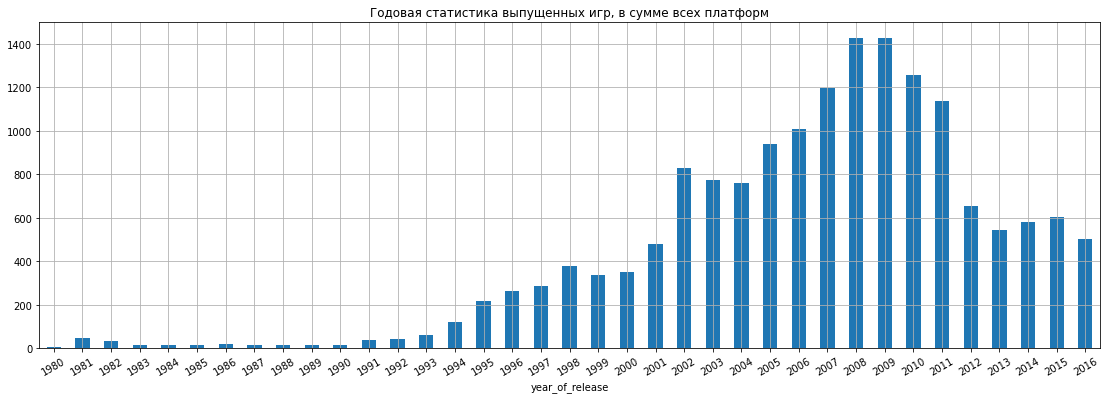

In [5]:
# изучаю годовую статистику выпущенных игр
games_by_year = df.groupby(by='year_of_release')['name'].count()
games_by_year.plot.bar(rot=30, figsize=(19,6), grid=True).set_title('Годовая статистика выпущенных игр, в сумме всех платформ');

Из диаграммы видно, что до 1994 года выпускалось крайне мало игр. Пик пришелся на 2008 и 2009 года, после чего количество выпускаемых игр стало сокращаться. С 2012 по 2016 в год выпускалось примерно одинаковое количество игр.

In [6]:
#изучаю изменение продаж по платформам
platform_grouped = pd.pivot_table(df, 
                                  index='year_of_release', 
                                  values='total_sales',
                                  columns='platform',
                                  aggfunc='sum')
#list_of_platform = df['platform'].unique()
#for chart in list_of_platform: #смотрю жизнеспособность и динамику продаж по каждой платформе
    #platform_grouped.plot(y=chart, figsize=(8,4));

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
Name: total_sales, dtype: float64


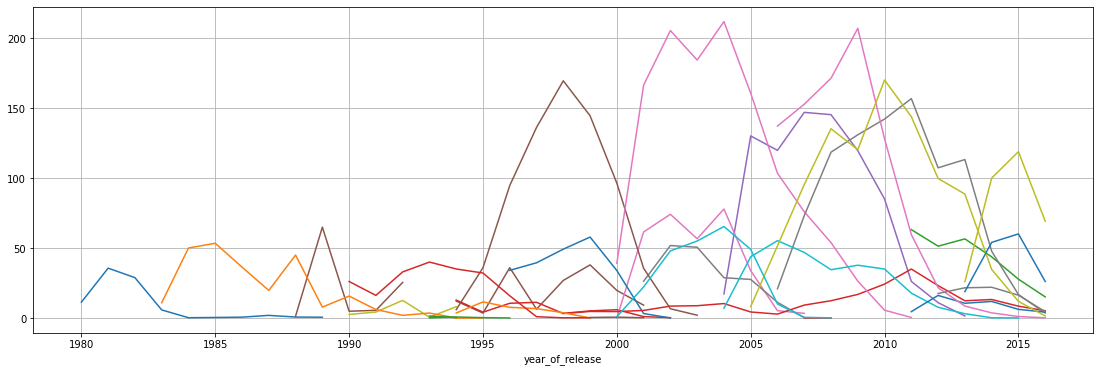

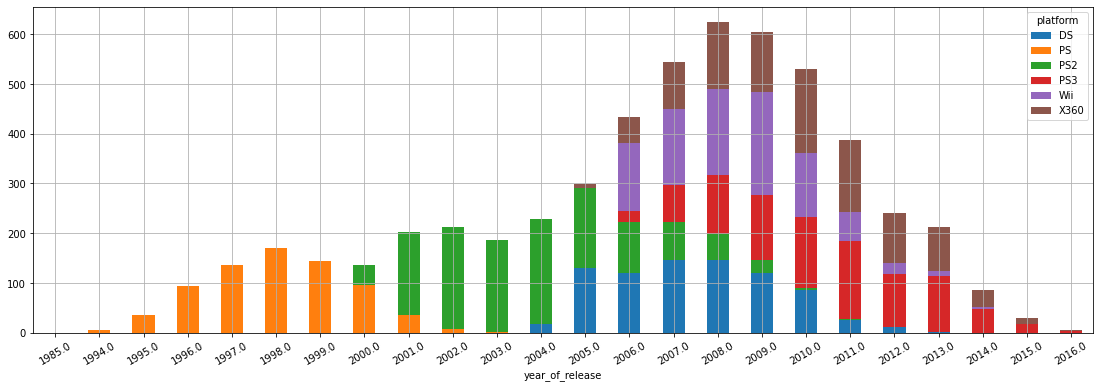

In [7]:
#смотрю распределение продаж по годам по топ 6 платформам
print(df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).head(6))

platform_stat = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
big_sales_indx = platform_stat.query('total_sales > 600')

top_plfm_stat = df.where(df['platform'].isin(big_sales_indx.index))
top_plfm_stat = top_plfm_stat.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')

platform_grouped.plot(figsize=(19,6), legend=False, grid=True);
top_plfm_stat.plot.bar(stacked=True, figsize=(19,6), grid=True, rot=30);

В среднем платформы появляются на срок до 10 лет, пик продаж приходится примерно на 3 год существования. С 1980 года появлялось примерно по 1-2 новых платформ каждое пятилетие, но уже с 1995 стало появляться по 5 платформ. Группировка показала, что наибольшее количество продаж было у 6 основных платформ (PS2, X360, PS3, Wii, DS, PS). Три самых первых (PS, PS2, DS) платформы закончили свое существование к 2012 году, остальные продолжают существовать, но продажи сильно упали.

На основе первой диаграммы, с показателями всех продаж по годам считаю, что актуальным периодом для расчета прогноза будет 5 лет с 2012 по 2016.

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


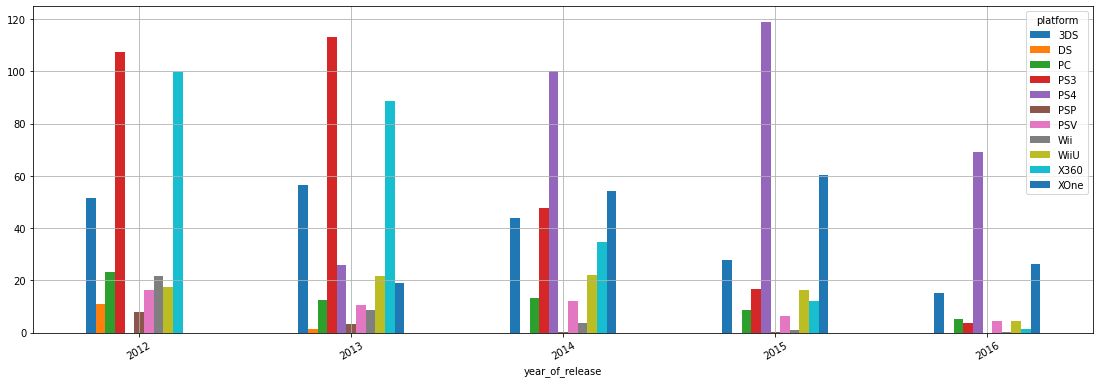

In [8]:
current_data = df.query('year_of_release >= 2012')
#print(current_data['year_of_release'].unique())
cur_pltf_stat = current_data.pivot_table(
    index='year_of_release',
    values='total_sales',
    columns='platform',
    aggfunc='sum',
    margins=False)
display(cur_pltf_stat)
cur_pltf_stat.plot.bar(figsize=(19,6), grid=True, rot=30);

Общий тренд продаж показывает, что в игровой индустрии с 2009 года начался спад продаж, и с 2012 по 2016 продажы находятся на одном уровне (во флэте). В целом за последние 5 лет лидерами по прадажам были - PS4 и Xone. Абсолютным лидером была PS4, которая смогла <div class="alert alert-info"> продать почти 70 млн копий, дальше Xone с 26 млн и замыкает тройку 3DS с 15 млн. Более того, данные платформы были лидерами по продажам последние 3 года (за исключением 3DS в 2014 была 4-й). Первые две платформы в 2014 пришли на смену двум другим лидерам - PS3 и X360, а платформа 3DS показывает стабильные продажи на протяжении всех 5 лет. Продажи остальных платформ незначительны, тогда как 2 из них DS и PSP совсем перестали продавать.

(0.0, 2.0)

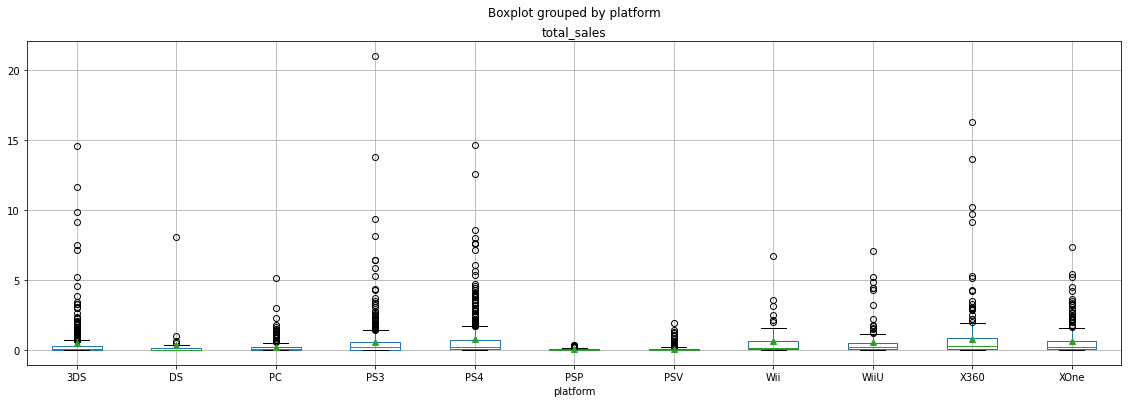

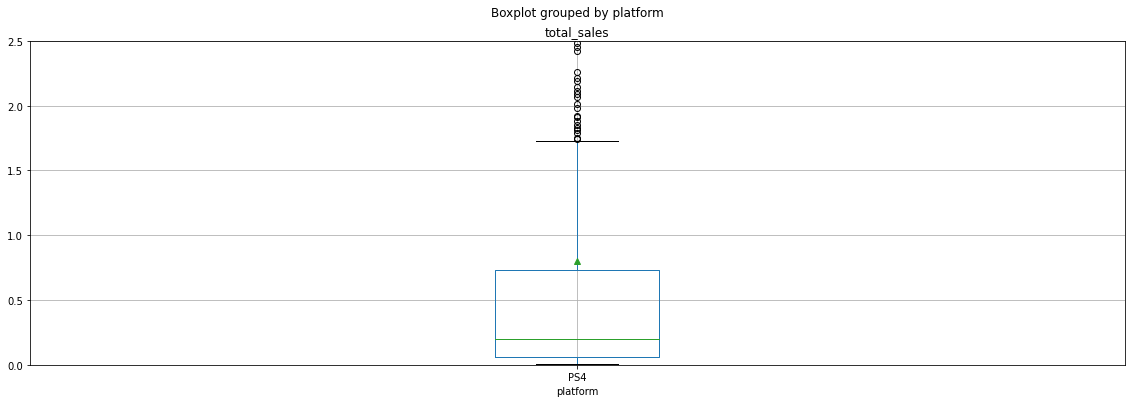

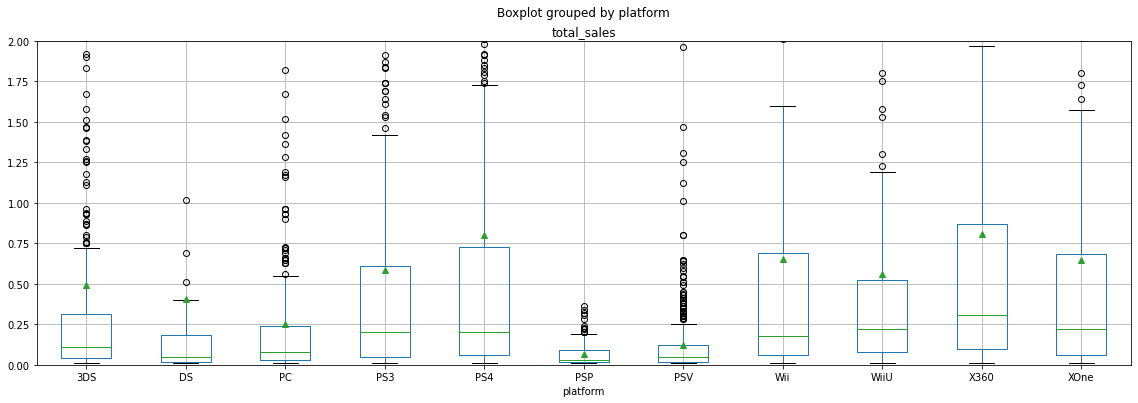

In [9]:
import matplotlib.pyplot as plt


boxplot = current_data.boxplot(by='platform', column='total_sales', figsize=(19,6), showmeans=True)
leader_stat = current_data.query('platform == "PS4"')
boxplot = leader_stat.boxplot(by='platform', column='total_sales', figsize=(19,6), showmeans=True)
plt.ylim([0, 2.5])
boxplot = current_data.boxplot(by='platform', column='total_sales', figsize=(19,6), showmeans=True)
plt.ylim([0, 2])

Построенные ящики для лидирующих по продажам платформ показывают, что выбросы в данных отсутствуют, значит можно анализировать без дельнейшей обрезки наблюдений. Значение медианы больше всего у лидера PS4, у XOne медиана равна среднему значению, что говорит о плавном распределении даных, однако значение у нее меньше чем у 3DS. У 3DS как и у PS4 медиана смещена к верхнему квартилю, значит большая часть данных имеет высокое значение. У PS4 усы самые большие, значит данные имеют самое большое значение разброса и дисперсии. У XOne усы очень маленькие и основные значение лежат между 1 и 3 квартелями. У 3DS нижние усы больше, значит разброс значение в данном направлении больше.

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 493 user_score 283 critic_score 214
Корреляция продаж c оценками игроков для  PS3 - -0.01
Корреляция продаж c оценками критиков для  PS3 - 0.33


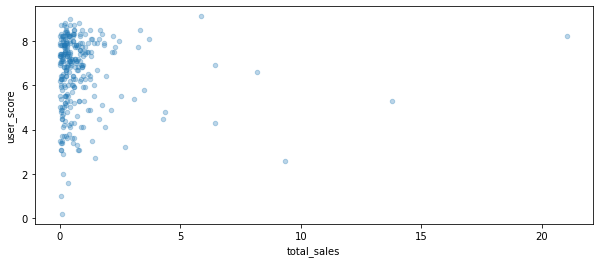

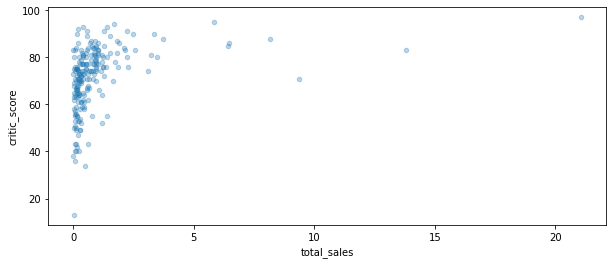

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 292 user_score 235 critic_score 171
Корреляция продаж c оценками игроков для  X360 - 0.01
Корреляция продаж c оценками критиков для  X360 - 0.36


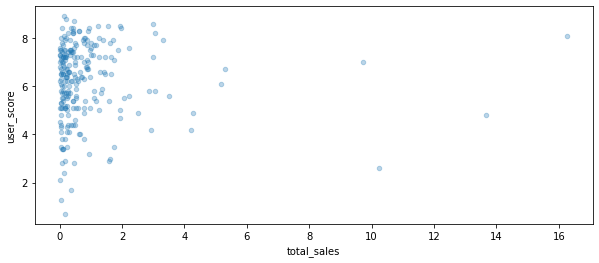

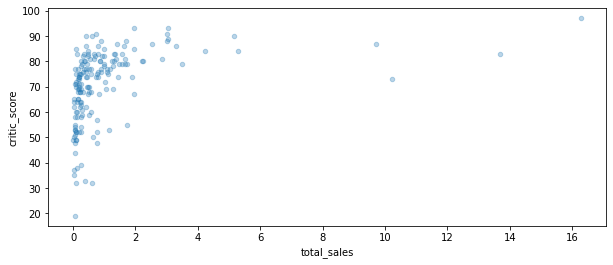

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 392 user_score 257 critic_score 252
Корреляция продаж c оценками игроков для  PS4 - -0.03
Корреляция продаж c оценками критиков для  PS4 - 0.41


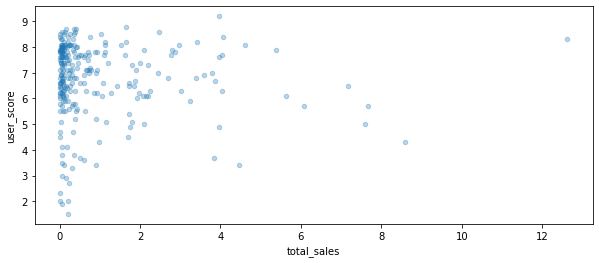

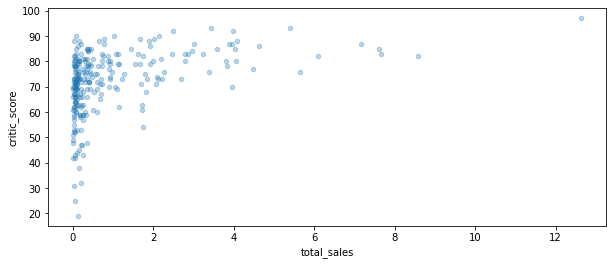

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 396 user_score 114 critic_score 104
Корреляция продаж c оценками игроков для  3DS - 0.2
Корреляция продаж c оценками критиков для  3DS - 0.32


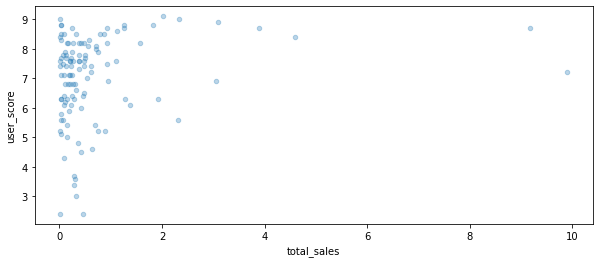

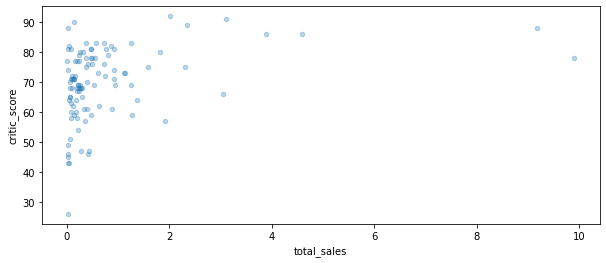

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 31 user_score 3 critic_score 1
Корреляция продаж c оценками игроков для  DS - 0.88
Корреляция продаж c оценками критиков для  DS - nan


/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


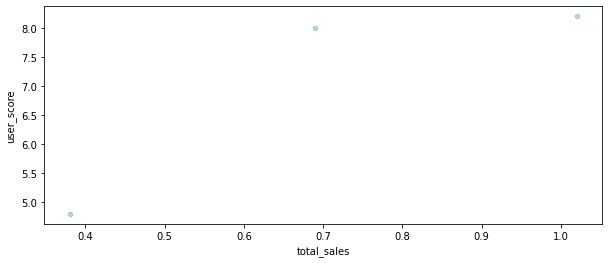

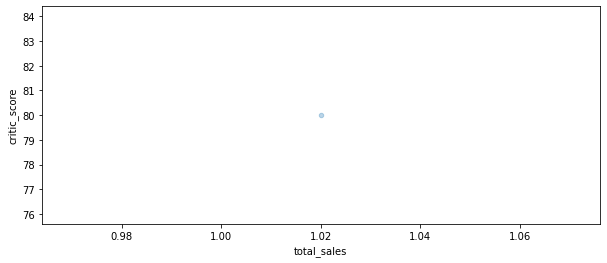

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 247 user_score 182 critic_score 169
Корреляция продаж c оценками игроков для  XOne - -0.07
Корреляция продаж c оценками критиков для  XOne - 0.42


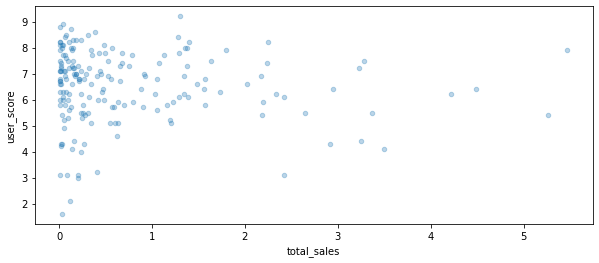

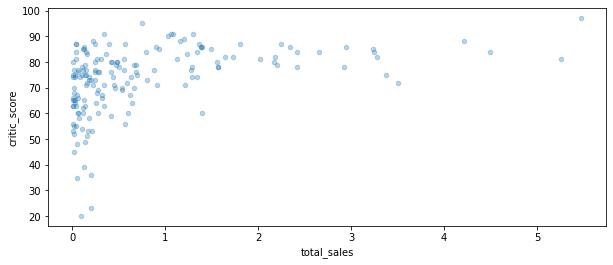

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 147 user_score 100 critic_score 90
Корреляция продаж c оценками игроков для  WiiU - 0.4
Корреляция продаж c оценками критиков для  WiiU - 0.35


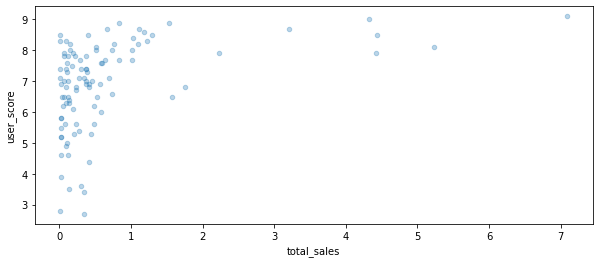

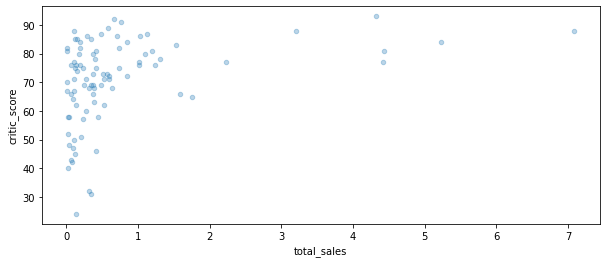

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 54 user_score 17 critic_score 5
Корреляция продаж c оценками игроков для  Wii - 0.3
Корреляция продаж c оценками критиков для  Wii - -0.42


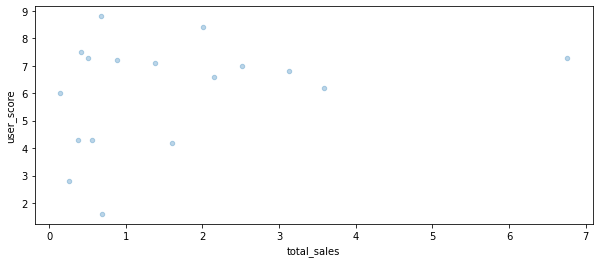

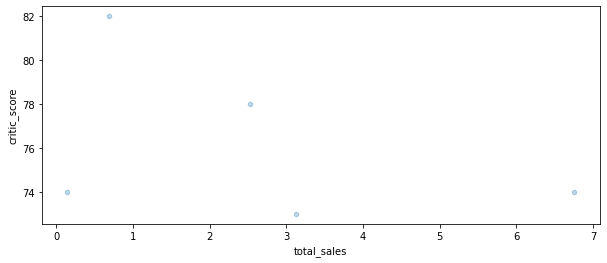

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 250 user_score 206 critic_score 198
Корреляция продаж c оценками игроков для  PC - -0.12
Корреляция продаж c оценками критиков для  PC - 0.24


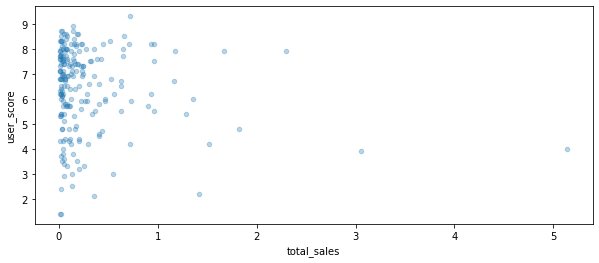

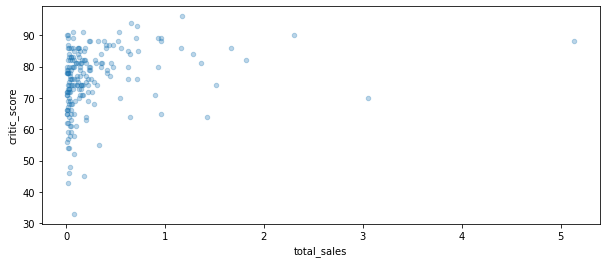

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 411 user_score 130 critic_score 107
Корреляция продаж c оценками игроков для  PSV - -0.0
Корреляция продаж c оценками критиков для  PSV - 0.09


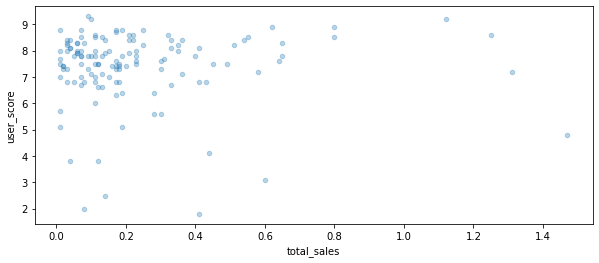

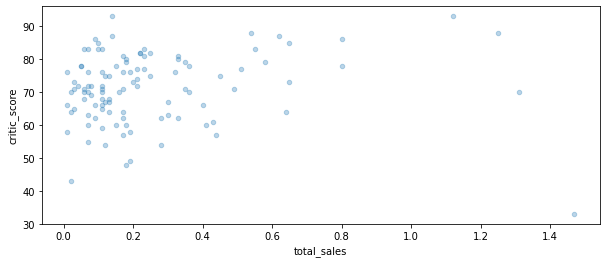

Количество пропусков в продажах 0
Количество пропусков в пользовательских оценках 0
Количество пропусков в оценках критиков 0
sales 173 user_score 4 critic_score 1
Корреляция продаж c оценками игроков для  PSP - -0.8
Корреляция продаж c оценками критиков для  PSP - nan


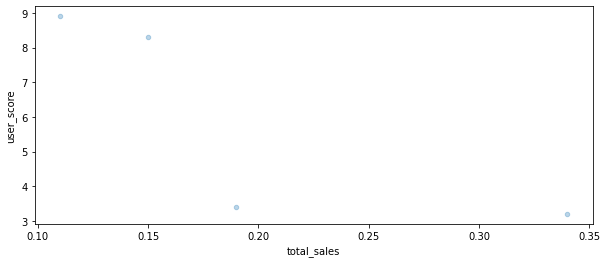

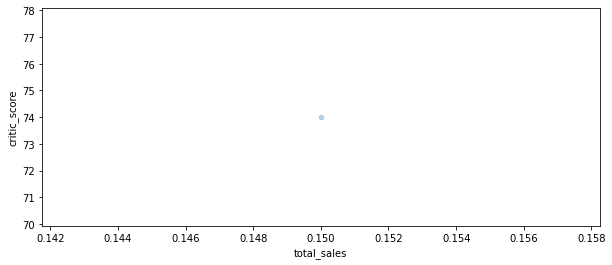

In [10]:
#leader_stat.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(19,6));
#leader_stat.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(19,6));

#print('Корреляция PS4 между продажами и оценками игроков', leader_stat['total_sales'].corr(leader_stat['user_score']).round(2))
#print('Корреляция PS4 между продажами и оценками критиков', leader_stat['total_sales'].corr(leader_stat['critic_score']).round(2))

#DS3_stat = current_data.query('platform == "3DS"')
#XOne_stat = current_data.query('platform == "XOne"')
#print('Корреляция 3DS между продажами и оценками игроков', DS3_stat['total_sales'].corr(DS3_stat['user_score']).round(2))
#print('Корреляция 3DS между продажами и оценками критиков', DS3_stat['total_sales'].corr(DS3_stat['critic_score']).round(2))
#print('Корреляция XOne между продажами и оценками игроков', XOne_stat['total_sales'].corr(XOne_stat['user_score']).round(2))
#print('Корреляция XOne между продажами и оценками критиков', XOne_stat['total_sales'].corr(XOne_stat['critic_score']).round(2))

list_of_platform = current_data['platform'].unique()
for platform in list_of_platform:
    sales = current_data[current_data['platform'] == platform]['total_sales'].dropna()
    user_score = current_data[current_data['platform'] == platform]['user_score'].dropna()
    critic_score = current_data[current_data['platform'] == platform]['critic_score'].dropna()
    corr_user_score = sales.corr(user_score)
    corr_critic_score = sales.corr(critic_score)
    print('Количество пропусков в продажах', sales.isna().sum())
    print('Количество пропусков в пользовательских оценках', user_score.isna().sum())
    print('Количество пропусков в оценках критиков', critic_score.isna().sum())
    #код ревьюера
    print('sales', len(sales), 'user_score', len(user_score), 'critic_score', len(critic_score))
    #end
    print('Корреляция продаж c оценками игроков для ',platform, '-', round(corr_user_score,2))
    print('Корреляция продаж c оценками критиков для ',platform, '-', round(corr_critic_score,2))
    current_data[current_data['platform'] == platform].plot(x='total_sales', y='user_score', kind='scatter', alpha=0.3, figsize=(10,4));
    current_data[current_data['platform'] == platform].plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.3, figsize=(10,4));
    plt.show()

Корреляция продаж и отзывов пользователей отрицательная и близка к 0, можно сказать что она отсутствует. Корреляция продаж и отзывов критиков больше, но не сильно. В целом можно сделать вывод, что у наиболее продающих платформ нет корреляций между продажами и рейтингом критиков и пользователей. 

,name,total_sales,sales_per_game
genre,,,
Action,1031,441.12,0.43
Shooter,235,304.73,1.30
Role-Playing,370,192.80,0.52
Sports,268,181.07,0.68
Misc,192,85.04,0.44
Platform,85,61.00,0.72
Racing,115,53.50,0.47
Fighting,109,44.49,0.41
Simulation,80,35.12,0.44


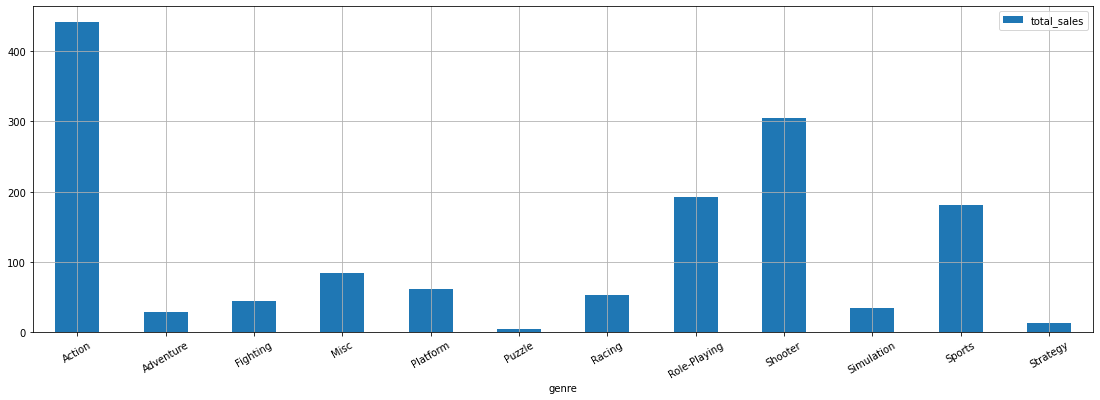

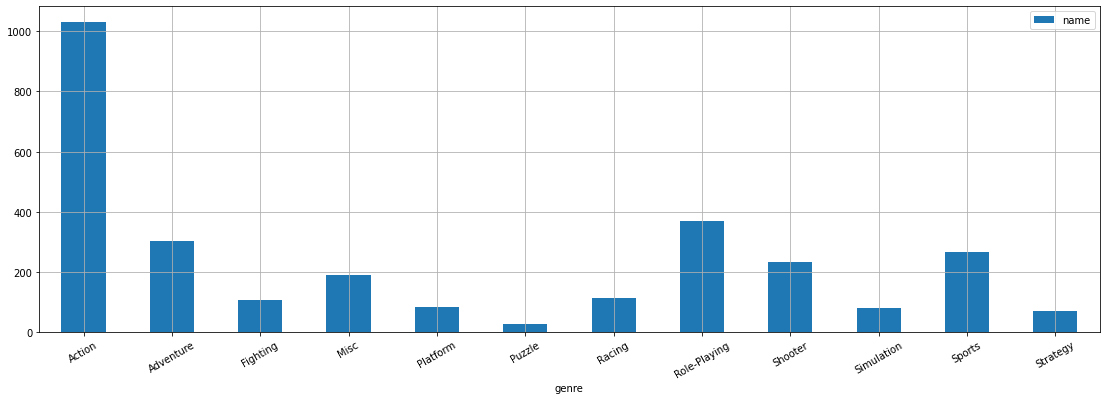

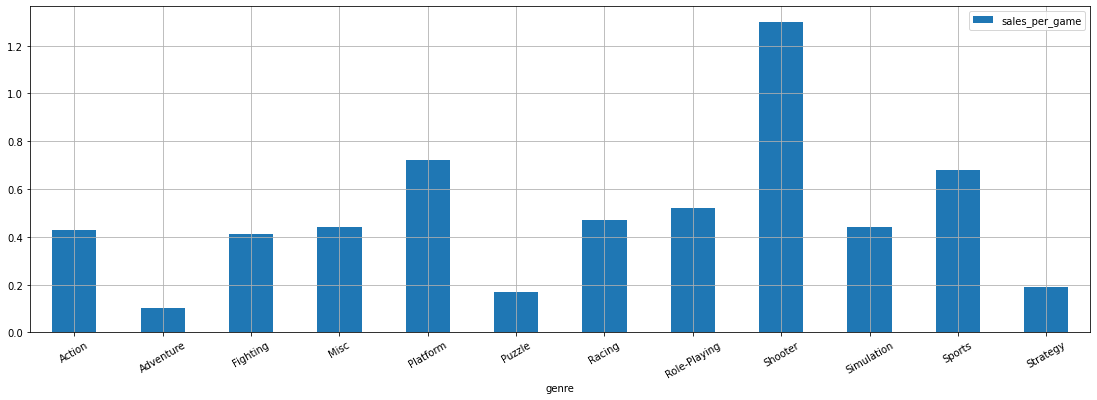

In [11]:
# изучаю распределение игр по жанрам и доходы в разных жанрах
genre_stat = current_data.pivot_table(
    index='genre',
    values=['total_sales', 'name'],
    aggfunc={'total_sales':'sum', 'name':'count'})
genre_stat['sales_per_game'] = (genre_stat['total_sales'] / genre_stat['name']).round(2)
display(genre_stat.sort_values(by='total_sales', ascending=False))

genre_stat.plot.bar(y='total_sales', figsize=(19,6), grid=True, rot=30);
genre_stat.plot.bar(y='name', figsize=(19,6), grid=True, rot=30);
genre_stat.plot.bar(y='sales_per_game', figsize=(19,6), grid=True, rot=30);

Анализируя жанры можно сказать, что больше всего дохода приносят жанры - Action, Shooter, Sports and Role-playing. В аутсайдерах такие жанры - Puzzle, Strategy, Adventure. Однако, стоит обратить внимание на большое количество выпущенных игр в жанре Action и низкое значение дохода на одну игру. Можно сделать вывод, что не все игры данного жанра приносят прибыль. Тогда как жанры Shooter, Sports больше всего приносят прибыль в расчете на одну игру.

**Шаг 4. Составьте портрет пользователя каждого региона**
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [12]:
#КОД РЕВЬЮЕРА **начало**

regions_sales = current_data.pivot_table(index='platform',
                                           values=['na_sales', 'eu_sales', 'jp_sales','total_sales'],
                                           aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()


In [13]:
regions_sales

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,141.09,15.96,108.74,314.14
1,PS3,106.86,35.29,103.38,288.79
2,X360,74.52,1.57,140.05,236.54
3,3DS,42.64,87.79,55.31,194.61
4,XOne,51.59,0.34,93.12,159.32
5,WiiU,25.13,13.01,38.10,82.19
6,PC,37.76,0.00,19.12,62.65
7,PSV,11.36,21.04,10.98,49.18
8,Wii,11.92,3.39,17.45,35.37
9,DS,3.53,3.72,4.59,12.55


In [14]:
regions_sales['platform'].where(~(regions_sales.index>=5), other="others", inplace=True)

In [15]:
regions_sales

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,141.09,15.96,108.74,314.14
1,PS3,106.86,35.29,103.38,288.79
2,X360,74.52,1.57,140.05,236.54
3,3DS,42.64,87.79,55.31,194.61
4,XOne,51.59,0.34,93.12,159.32
5,others,25.13,13.01,38.10,82.19
6,others,37.76,0.00,19.12,62.65
7,others,11.36,21.04,10.98,49.18
8,others,11.92,3.39,17.45,35.37
9,others,3.53,3.72,4.59,12.55


In [16]:
#КОД РЕВЬЮЕРА **конец**

In [17]:
#pltf_per_region = current_data.pivot_table(index='platform',
                                           #values=['na_sales', 'eu_sales', 'jp_sales'],
                                           #aggfunc='sum')
#display(pltf_per_region)
#pltf_per_region.plot.pie(y='eu_sales', figsize=(19,6), grid=True, rot=30, legend=False);
#pltf_per_region.plot.pie(y='na_sales', figsize=(19,6), grid=True, rot=30, legend=False);
#pltf_per_region.plot.pie(y='jp_sales', figsize=(19,6), grid=True, rot=30, legend=False);

eu_data = current_data
eu_sales_pie = current_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
eu_sales_pie = eu_sales_pie.sort_values(by='eu_sales', ascending=False)
list_top_five_eu = eu_sales_pie.head()
print(list_top_five_eu)
print(eu_data)

#eu_data['platform'] = eu_data['platform'].where(eu_data['platform'].isin(list_top_five_eu), 'Other').reset_index()

for item in eu_data['platform']:
    if item not in list_top_five_eu:
        eu_data['platform'] = 'Other'

#print(eu_top)
#eu_top.plot.pie(y='sales', labels=eu_sales['platform'], figsize=(19,6), grid=True, rot=30, legend=False, autopct='%0.1f%%');
#plt.title('Топ 5 платформ в регионе EA')

#na_sales_pie = current_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
#na_sales_pie = na_sales_pie.sort_values(by='na_sales', ascending=False)
#data = {'platform':['X360', 'PS4', 'PS3', 'XOne', '3DS', 'Другие'], 'sales':[140.05, 108.74, 103.38, 93.12, 55.31, 90.37]}
#na_sales = pd.DataFrame(data)
#na_sales.plot.pie(y='sales', labels=na_sales['platform'], figsize=(19,6), grid=True, rot=30, legend=False, autopct='%0.1f%%');
#plt.title('Топ 5 платформ в регионе NA')



#jp_sales_pie = current_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
#jp_sales_pie = jp_sales_pie.sort_values(by='jp_sales', ascending=False)
#data = {'platform':['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'Другие'], 'sales':[87.79, 35.29, 21.04, 15.96, 13.01, 19.49]}
#jp_sales = pd.DataFrame(data)
#jp_sales.plot.pie(y='sales', labels=jp_sales['platform'], figsize=(19,6), grid=True, rot=30, legend=False, autopct='%0.1f%%');
#plt.title('Топ 5 платформ в регионе JP')

          eu_sales
platform          
PS4         141.09
PS3         106.86
X360         74.52
XOne         51.59
3DS          42.64
                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
34        Call of Duty: Black Ops II      PS3             2012       Shooter   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     

/tmp/ipykernel_146/2516643740.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_data['platform'] = 'Other'


Самые популярные платформы для пользователей европейского региона - PS4, PS3, X360, XOne and 3DS. Учитывая то, что продажи у PS3 и X360 к концу 2016 года заметно упали, стоит обратить внимание на их приемников PS4 и XOne. В качестве альтернативной платформы для региона остается 3DS. Аналогичная ситуация для пользователей Американского континента.

Японские игроки отдают предпочтение платформе 3DS, далее самые большие продажи у семейства PS4, PS3, PSV и на последнем месте по прадажам платформа WiiU.

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


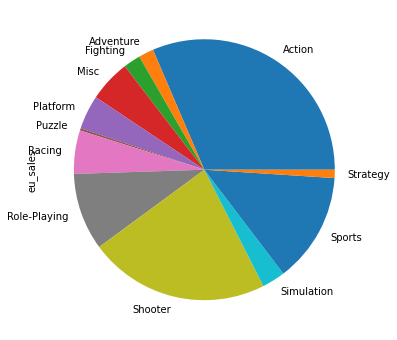

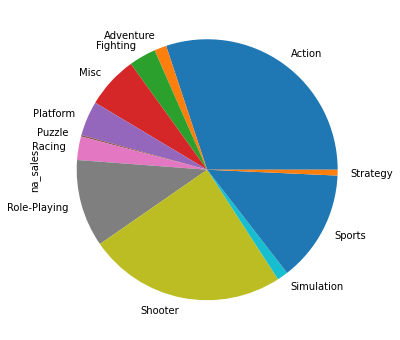

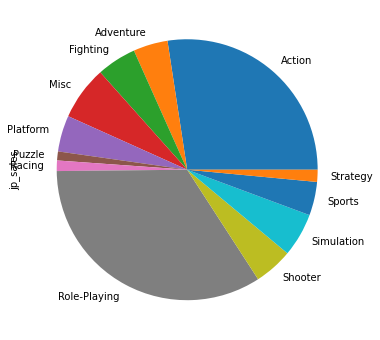

In [18]:
genre_per_region = current_data.pivot_table(index='genre',
                                           values=['na_sales', 'eu_sales', 'jp_sales'],
                                           aggfunc='sum')
display(genre_per_region)
genre_per_region.plot.pie(y='eu_sales', figsize=(19,6), grid=True, rot=30, legend=False);
genre_per_region.plot.pie(y='na_sales', figsize=(19,6), grid=True, rot=30, legend=False);
genre_per_region.plot.pie(y='jp_sales', figsize=(19,6), grid=True, rot=30, legend=False);

У европейцев топ-5 популярных жаноров - Action, Shooter, Sports, Role-playing, Racing.
У американцев почти такой же набор - Action, Shooter, Sports, Role-playing, Misc.
Японцы больше всего предпочитают Role-playing и Action, доля остальных сильно меньше - Misc, Simulation, Platform.


In [19]:
ersb_per_region = current_data.pivot_table(index='rating',
                                           values=['na_sales', 'eu_sales', 'jp_sales'],
                                           aggfunc='sum')
display(ersb_per_region)

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
T,52.96,26.02,66.02
unknown,91.50,108.84,103.31


В европейском и американском регионах больше всего продаж игр с рейтингом mature (M), потом everyone (E).
В японском регионе продажи примерно одинаковые в рейтингах mature (M), everyone (E), teen (T). <div class="alert alert-info">
Также необходимо отметить большую долю игр Японского региона без рейтинка Американской ассоциации, так как для платформ компании Sony они не присваивались. 

**Шаг 5. Проверьте гипотезы**
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

In [20]:
from scipy import stats as st
import numpy as np

sample_1 = current_data.query('platform == "XOne"')
sample_1 = sample_1.dropna(subset=['user_score'])
sample_1 = sample_1['user_score'].tolist()

sample_2 = current_data.query('platform == "PC"')
sample_2 = sample_2.dropna(subset=['user_score'])
sample_2 = sample_2['user_score'].tolist()

alpha = .01

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение', results.pvalue)
print('Дисперсия первой выборки', round(np.var(sample_1),2))
print('Дисперсия второй выборки', round(np.var(sample_2),2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение nan
Дисперсия первой выборки nan
Дисперсия второй выборки nan
Не получилось отвергнуть нулевую гипотезу


/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Для проверки первой гипотезы использовал гипотезу о равенстве средних двух генеральных совокупностей, где нулевая - средний рейтнг платформ одинаковый, альтернативная - средний рейтинг отличается. Параметр о равности дисперсий выборки (equal_var) уставливаю как False, так как выборки не зависят друг от друга, но не уверен в равенстве дисперсий.

Значение p-value оказалось равно 1, то есть 100%. Как-то мне не очень нравится это значение, может где-то ошибка. Тем не менее, это значит, что средние пользовательские рейтинги у платформ равны.

<div class="alert alert-info">
Дополнил расчет дисперсий для выборок.
    По обновленным данным получилось, что отвергнуть нулевую гипотезу не получается так как показатель p-value равен 0,54, что больше чем установленный уровень статистической значимости. Значит можно сделать вывод, что средние пользовательские рейтинги платформ с большей вероятностью будут равны чем отличаться.

In [21]:
sample_3 = current_data.query('genre == "Action"')
sample_3 = sample_3.dropna(subset=['user_score'])
sample_3 = sample_3['user_score'].tolist()

sample_4 = current_data.query('genre == "Sports"')
sample_4 = sample_4.dropna(subset=['user_score'])
sample_4 = sample_4['user_score'].tolist()

alpha = .01

results = st.ttest_ind(sample_3, sample_4, equal_var=False)

print('p-значение', results.pvalue)
print('Дисперсия первой выборки', round(np.var(sample_3),2))
print('Дисперсия второй выборки', round(np.var(sample_4),2))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 4.24307776572644e-20
Дисперсия первой выборки 1.89
Дисперсия второй выборки 3.01
Отвергаем нулевую гипотезу


 <div class="alert alert-info">
<b>Комментарий студента 3:<b>
Вывод: На основании полученного значение p-value можно принять решение в пользу альтернативной гипотезы (средний рейтинг разный), так как уровень статистической значимости больше, чем p-value.